<a href="https://colab.research.google.com/github/woodstone10/audio-sound-lab/blob/main/Sound_classification_UrbanSound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sound Classification, Urband Sound

The dataset is called UrbanSound and contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: 

Air Conditioner, Car Horn, Children Playing, Dog bark, Drilling, Engine Idling, Gun Shot, Jackhammer, Siren, Street Music. The attributes of data are as follows: ID – Unique ID of sound excerpt Class – type of sound

Reference: 
- https://towardsdatascience.com/urban-sound-classification-using-neural-networks-9b6fcd8a9150
- https://www.kaggle.com/mychen76/automatic-urban-sound-classification-with-cnn

Dataset:
- https://drive.google.com/drive/folders/0By0bAi7hOBAFUHVXd1JCN3MwTEU
- https://www.kaggle.com/chrisfilo/urbansound8k

In this code, I use towarddatascience.com

In [ ]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing

**GPU usage**
- Edit -> Notebook setting -> GPU

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data**

---



In [ ]:
data = pd.read_csv('drive/My Drive/My Colab/dataset/UrbanSound/train/train.csv')
print(data.shape)
data

(5435, 2)


,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
...,...,...
5430,8725,engine_idling
5431,8726,dog_bark
5432,8727,engine_idling
5433,8728,engine_idling


# Extract features from sound/audio data

---
**librosa library**. It is a good library to use with audio files.

Using librosa library, I will be extracting four features from the audio files. 
- Mel-frequency cepstral coefficients (MFCCs)
- tonnetz
- mel-scaled spectrogram 
- chromagram from a waveform.


In [ ]:
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
from tqdm import tqdm

mfcc=[]
chromagram=[]
mel_scaled_spectrogram=[]
tonnetz=[]
label=[]
for i in tqdm(range(len(data))):
  f = 'drive/My Drive/My Colab/dataset/UrbanSound/train/Train/'+str(data.ID[i])+'.wav'
  X, sr = librosa.load(f, res_type='kaiser_fast')
  mfcc.append(np.mean(librosa.feature.mfcc(y=X, sr=sr).T, axis=0))
  l=data.Class[i]
  label.append(l)
  try:
    tonnetz.append(np.mean(librosa.feature.tonnetz(
                    y=librosa.effects.harmonic(X),
                    sr=sr).T,axis=0))
  except:
    print(f)  
  mel_scaled_spectrogram.append(np.mean(librosa.feature.melspectrogram(X, sr=sr).T,axis=0))
  chromagram.append(np.mean(librosa.feature.chroma_stft(S=np.abs(librosa.stft(X)), sr=sr).T,axis=0))

  0%|          | 8/5435 [00:14<2:15:50,  1.50s/it]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=785
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=393
  n_fft, y.shape[-1]
  0%|          | 12/5435 [00:18<1:39:48,  1.10s/it]/usr/local/lib/python3.7/dist-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=675
  n_fft, y.shape[-1]
  0%|          | 20/5435 [00:25<1:30:15,  1.00s/it]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=953
  n_fft, y.shape[-1]
  1%|         

After extracting features from the audio files, save the features because it will take a lot of time to extract features.

In [ ]:
df_mfcc = pd.DataFrame(mfcc)
df_mfcc.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/mfcc.csv', index=False)

df_chromagram = pd.DataFrame(chromagram)
df_chromagram.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/chromagram.csv', index=False)

df_mel_scaled_spectrogram = pd.DataFrame(mel_scaled_spectrogram)
df_mel_scaled_spectrogram.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/mel_scaled_spectrogram.csv', index=False)

df_tonnetz = pd.DataFrame(tonnetz)
df_tonnetz.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/tonnetz.csv', index=False)

df_label = pd.DataFrame(label)
df_label.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/labels.csv', index=False)


In [ ]:
mfcc_csv = pd.read_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/mfcc.csv')
print(mfcc_csv.shape)
mfcc_csv.head()

(5435, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-82.123589,139.505920,-42.430866,24.827860,-11.620764,23.497084,-12.194590,25.897139,-9.405277,21.210430,-7.368822,14.254338,-8.678699,7.750238,-10.124115,3.258119,-11.352619,2.800969,-7.046013,3.913313
1,-15.744005,124.119965,-29.428881,39.447193,-23.501913,16.550816,-21.736818,16.533573,-16.971729,4.483583,-17.387690,0.737122,-16.289228,5.112149,-10.559232,2.917874,-10.390848,0.651300,-10.046337,-1.783480
2,-123.393654,15.181946,-50.093330,7.141873,-26.817034,-0.692503,-8.223075,13.512939,-11.382056,19.949352,-11.193459,9.592905,-8.269169,4.591708,-4.116093,-0.126610,-9.266361,12.864650,-6.768131,0.179706
3,-213.278809,89.323586,-55.256187,12.632097,-47.775375,14.702908,19.039341,15.974401,-0.344621,-3.852786,-5.713519,14.502379,7.356252,2.771509,-12.166412,-7.542644,-1.077182,-8.326868,11.310694,13.054640
4,-237.926483,135.902451,39.268440,21.240240,9.531328,13.885118,-3.994446,12.481486,-2.604627,6.070915,2.238367,4.174973,-1.903013,2.307794,-2.660800,-0.664915,4.498244,3.772043,3.371264,1.599586


In [ ]:
chromagram_csv = pd.read_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/chromagram.csv')
print(chromagram_csv.shape)
chromagram_csv.head()

(5435, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.798327,0.840953,0.819065,0.806548,0.825885,0.849393,0.868582,0.825281,0.810259,0.772253,0.769334,0.796989
1,0.575610,0.546653,0.525930,0.508931,0.688916,0.691444,0.489670,0.494668,0.543663,0.810689,0.785146,0.608858
2,0.700812,0.668266,0.676110,0.665355,0.737606,0.696300,0.608160,0.719226,0.881906,0.869968,0.780703,0.784422
3,0.260262,0.820999,0.325631,0.178656,0.136536,0.118298,0.225217,0.324424,0.179110,0.123921,0.125879,0.151198
4,0.667948,0.632870,0.644284,0.625069,0.649257,0.694544,0.744708,0.793098,0.698984,0.713904,0.727817,0.724217


In [ ]:
mel_scaled_spectrogram_csv = pd.read_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/mel_scaled_spectrogram.csv')
print(mel_scaled_spectrogram_csv.shape)
mel_scaled_spectrogram_csv.head()

(5435, 128)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,5.877411,20.340004,52.088253,38.230877,10.435853,9.489508,14.070208,13.531417,9.395260,9.965685,5.377651,3.791810,3.714450,2.822271,1.610408,1.565742,0.982282,1.232149,1.769040,2.172304,2.772805,3.525201,4.575321,5.853333,5.626757,4.193027,4.340253,4.359746,4.521832,4.630864,4.123395,4.109125,4.670904,2.934501,2.374004,3.214286,3.681732,2.842596,2.082450,3.194991,...,0.052536,0.056447,0.048744,0.051100,0.032841,0.022725,0.019507,0.016730,0.018125,0.017003,0.017844,0.016244,0.014865,0.015109,0.015664,0.013348,0.013146,0.012771,0.012263,0.010395,0.009985,0.009947,0.009435,0.008442,0.008900,0.007237,0.006975,0.006928,0.005444,0.004113,0.003204,0.002137,0.001383,0.000757,0.000374,0.000128,0.000032,0.000007,0.000001,2.831151e-07
1,2.328740,5.625119,10.602100,22.258751,27.538069,53.135811,74.963402,103.341446,158.113419,81.474297,43.666111,45.778381,51.535275,26.238728,21.532187,44.934254,87.780067,58.224857,13.114926,15.695145,7.193051,8.286250,10.031291,12.123662,48.544392,35.174423,31.314819,4.575533,2.973881,8.014187,6.084786,4.675527,22.106607,48.604053,23.390707,32.783848,19.779991,18.528471,9.919031,13.562368,...,0.318102,0.329948,0.272428,0.325282,0.294820,0.277698,0.264247,0.410340,0.394846,0.356125,0.272027,0.325519,0.255094,0.174824,0.257400,0.257260,0.158800,0.127398,0.107292,0.113698,0.108072,0.098765,0.087089,0.078510,0.066117,0.050605,0.038329,0.032963,0.026923,0.021727,0.018180,0.014340,0.008827,0.005069,0.002706,0.001259,0.000413,0.000092,0.000025,1.074347e-05
2,0.026694,0.078798,0.053526,0.075048,0.091382,0.107063,0.109533,0.074785,0.100341,0.188707,0.372295,0.954707,0.807453,0.163671,0.222571,0.227095,0.254181,0.212592,0.266899,0.359113,0.425131,0.574945,0.687176,0.768159,0.927922,1.175685,0.977765,0.778919,0.819340,0.775529,0.899296,1.444801,1.627017,0.877204,0.843300,0.581521,0.391390,0.491409,0.573496,0.728664,...,0.962539,0.966595,1.100011,0.802551,0.571188,0.531789,0.476340,0.316416,0.213784,0.200411,0.211329,0.330391,0.696004,0.311882,0.161351,0.210916,0.211570,0.207319,0.250787,0.323821,0.359533,0.308742,0.419332,0.437357,0.236439,0.226298,0.259545,0.248087,0.173993,0.098200,0.087542,0.064008,0.053749,0.047919,0.064793,0.070776,0.023906,0.003909,0.000300,3.851427e-05
3,0.191212,0.300321,0.206204,0.146588,0.142842,0.156775,0.070641,0.055352,0.074088,0.053485,0.029692,0.035816,0.027011,0.044805,0.032780,0.023934,0.040089,0.070887,0.045189,0.232594,2.831347,1.854629,0.281505,2.826962,8.256710,0.603228,0.085974,0.784119,56.841576,266.438751,18.871229,3.471932,0.602944,0.443714,3.646336,3.410987,0.274635,1.611476,8.952804,2.877738,...,0.024934,0.065746,0.053361,0.328468,0.088813,0.192778,2.518058,0.245550,0.020887,0.009483,0.021500,0.018034,0.004929,0.005804,0.078992,0.019821,0.000851,0.000671,0.000627,0.000750,0.000881,0.009787,0.001945,0.001049,0.000867,0.000835,0.000902,0.001774,0.000481,0.000223,0.000119,0.000137,0.000267,0.000064,0.000014,0.000007,0.000004,0.000002,0.000001,1.134319e-06
4,93.433754,20.797619,13.922636,39.115589,35.508526,26.701662,44.422333,36.856346,22.099035,20.324266,46.353889,57.243988,60.252785,140.314514,230.830231,53.888447,34.651089,23.339006,21.016939,20.276577,16.411343,14.457240,10.747212,8.161489,9.670343,8.506935,8.377049,16.127604,28.042717,37.456680,6.451833,2.483240,1.965076,0.922550,0.795596,1.483466,1.428408,0.702350,0.706335,0.573911,...,0.003509,0.003198,0.002093,0.002420,0.002765,0.002593,0.004771,0.007464,0.010086,0.021385,0.053465,0.108770,0.012978,0.005475,0.005300,0.006952,0.011111,0.012340,0.008067,0.007551,0.009107,0.006648,0.009348,0.093702,0.062992,0.037402,0.024156,0.015495,0.006807,0.013353,0.021637,0.009330,0.001840,0.000846,0.000987,0.000325,0.000188,0.000149,0.000014,3.938324e-06


In [ ]:
tonnetz_spectrogram_csv = pd.read_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/tonnetz.csv')
print(tonnetz_spectrogram_csv.shape)
tonnetz_spectrogram_csv.head()

(5435, 6)


,0,1,2,3,4,5
0,-0.003187,0.005104,-0.036059,-0.029152,-0.007110,0.025727
1,0.017137,0.068678,-0.129723,0.006873,0.014044,0.000799
2,-0.002272,-0.006441,0.014953,0.049981,-0.015763,-0.010118
3,-0.141602,-0.280224,-0.244525,-0.023331,0.210154,-0.120574
4,-0.012800,0.000354,0.005635,-0.062591,0.015265,-0.009479


In [ ]:
labels_csv = pd.read_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/labels.csv')
print(labels_csv.shape)
labels_csv.head()

(5435, 1)


,0
0,siren
1,street_music
2,drilling
3,siren
4,dog_bark


I have got 166~186 features for each audio files with their respective labels.

Concatenate features into one array so that it can be passed to the model.


In [ ]:
features = []
for i in range(len(tonnetz)):
  features.append(np.concatenate((mel_scaled_spectrogram[i], 
                                  mfcc[i],
                                  tonnetz[i], 
                                  chromagram[i]),
                                 axis=0))
df_features = pd.DataFrame(features)
df_features.to_csv('drive/My Drive/My Colab/deep_learning_study-python/Sound_classification_UrbanSound/features.csv', index=False)
df_features.shape

(5435, 166)

Encode the labels so that model can understand.


In [ ]:
la = pd.get_dummies(label)
label_columns = la.columns
target = la.to_numpy()

Normalize the features so that gradient descents can converge more quickly.

In [ ]:
tran = sklearn.preprocessing.StandardScaler()
features_train = tran.fit_transform(features)

Now will create train, validation and test dataset.

In [ ]:
feat_train=features_train[:4434]
target_train=target[:4434]

y_train=features_train[4434:5330]
y_val=target[4434:5330]

test_data=features_train[5330:]
test_label=target[5330:]

print("Training",feat_train.shape)
print(target_train.shape)
print("Validation",y_train.shape)
print(y_val.shape)
print("Test",test_data.shape)
print(test_label.shape)

Training (4434, 166)
(4434, 10)
Validation (896, 166)
(896, 10)
Test (105, 166)
(105, 10)


# Model with CNN

---



In [ ]:
model = \
    tf.keras.Sequential([
        tf.keras.layers.Dense(166, input_dim=166, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.6),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax') 
    ])

model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'], 
              optimizer='adam')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 166)               27722     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               42752     
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 104,660
Trainable params: 104,660
Non-trainable params: 0
________________________________________________

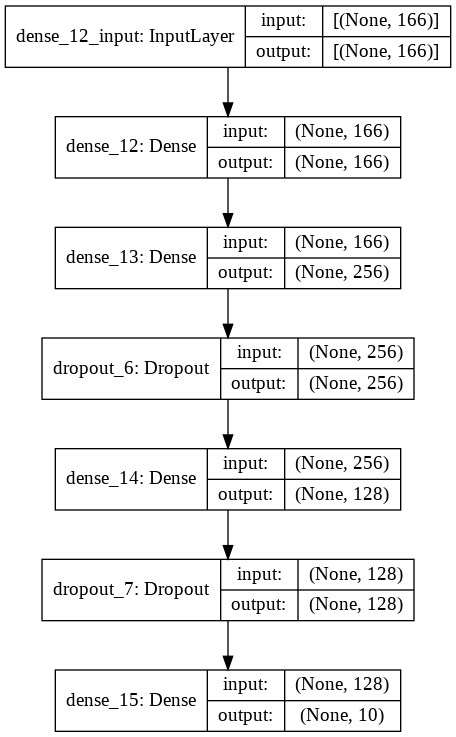

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
with tf.device('/device:GPU:0'):
  history = model.fit(feat_train, target_train, 
                    batch_size=64, 
                    epochs=30,
                    validation_data=(y_train, y_val)
                    )

Epoch 1/30
70/70 [==============================] - 4s 6ms/step - loss: 2.2854 - accuracy: 0.1883 - val_loss: 1.4683 - val_accuracy: 0.5458
Epoch 2/30
70/70 [==============================] - 0s 3ms/step - loss: 1.5796 - accuracy: 0.4557 - val_loss: 1.1417 - val_accuracy: 0.6395
Epoch 3/30
70/70 [==============================] - 0s 4ms/step - loss: 1.2614 - accuracy: 0.5869 - val_loss: 0.9564 - val_accuracy: 0.6964
Epoch 4/30
70/70 [==============================] - 0s 4ms/step - loss: 1.0438 - accuracy: 0.6607 - val_loss: 0.8329 - val_accuracy: 0.7444
Epoch 5/30
70/70 [==============================] - 0s 4ms/step - loss: 0.9098 - accuracy: 0.7211 - val_loss: 0.7635 - val_accuracy: 0.7779
Epoch 6/30
70/70 [==============================] - 0s 4ms/step - loss: 0.7769 - accuracy: 0.7488 - val_loss: 0.6908 - val_accuracy: 0.7980
Epoch 7/30
70/70 [==============================] - 0s 4ms/step - loss: 0.7295 - accuracy: 0.7692 - val_loss: 0.6266 - val_accuracy: 0.8114
Epoch 8/30
70/70 [==

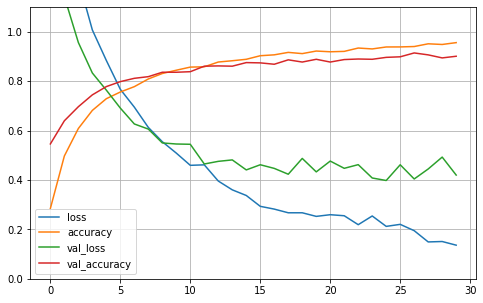

In [ ]:
# Learning curve (loss and accuracy)
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid()
plt.gca().set_ylim(0,1.1)
plt.show()

**Continue**....

In [ ]:
sample = 'drive/My Drive/My Colab/dataset/UrbanSound/sample/0.wav'

In [ ]:
y, sr = librosa.load(sample)
print(y.shape)
print(y)
print(sr)

(88200,)
[-0.01212928 -0.02760112 -0.02535508 ...  0.09790608  0.04330474
 -0.00681015]
22050


In [ ]:
librosa.display.waveplot(y,sr)